In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def forward(X, W1, b1, W2, b2):
    #Z = sigmoid(X.dot(W1) + b1)
    Z = 1 / (1 + np.exp(-X.dot(W1) - b1))
    A = Z.dot(W2) + b2
    expA = np.exp(A)
    Y = expA / expA.sum(axis=1, keepdims=True)
    return Y, Z

# determine the classification rate
# num correct / num total
def classification_rate(Y, P):
    n_correct = 0
    n_total = 0
    for i in range(len(Y)):
        n_total += 1
        if Y[i] == P[i]:
            n_correct += 1
    return float(n_correct) / n_total

In [3]:
def derivative_w2(Z, T, Y):
    N, K = T.shape
    M = Z.shape[1] # H is (N, M)

    # # slow
    #ret1 = np.zeros((M, K))
    #for n in range(N):
    #    for m in range(M):
    #        for k in range(K):
    #            ret1[m,k] += (T[n,k] - Y[n,k])*Z[n,m]

    # # a bit faster - let's not loop over m
    #ret2 = np.zeros((M, K))
    #for n in range(N):
    #    for k in range(K):
    #        ret2[:,k] += (T[n,k]* - Y[n,k])*Z[n,:]

    #assert(np.abs(ret1 - ret2).sum() < 0.00001)

    # # even faster  - let's not loop over k either
    #ret3 = np.zeros((M, K))
    #for n in range(N): # slow way first
    #    ret3 += np.outer( Z[n], T[n] - Y[n] )

    #assert(np.abs(ret1 - ret3).sum() < 0.00001)

    # fastest - let's not loop over anything
    ret4 = Z.T.dot(T - Y)
    # assert(np.abs(ret1 - ret4).sum() < 0.00001)

    return ret4


def derivative_w1(X, Z, T, Y, W2):
    N, D = X.shape
    M, K = W2.shape

    # slow way first
    #ret1 = np.zeros((X.shape[1], M))
    #for n in range(N):
    #    for k in range(K):
    #        for m in range(M):
    #            for d in range(D):
    #                ret1[d,m] += (T[n,k] - Y[n,k])*W2[m,k]*Z[n,m]*(1 - Z[n,m])*X[n,d]

    # fastest
    dZ = (T - Y).dot(W2.T) * Z * (1 - Z)
    ret2 = X.T.dot(dZ)

    # assert(np.abs(ret1 - ret2).sum() < 0.00001)

    return ret2


def derivative_b2(T, Y):
    return (T - Y).sum(axis=0)


def derivative_b1(T, Y, W2, Z):
    return ((T - Y).dot(W2.T) * Z * (1 - Z)).sum(axis=0)

In [4]:
def cost(T, Y):
    tot = T * np.log(Y)
    return tot.sum()

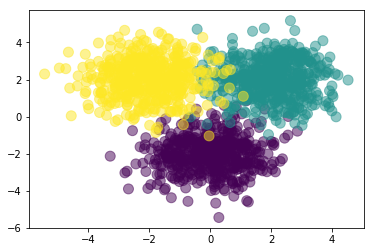

In [5]:
# create the data
Nclass = 500
D = 2 # dimensionality of input
M = 3 # hidden layer size
K = 3 # number of classes

X1 = np.random.randn(Nclass,2) + np.array([0,-2]) # centred at gaussian 0,2
X2 = np.random.randn(Nclass,2) + np.array([2,2]) # centred at gaussian 2,2
X3 = np.random.randn(Nclass,2) + np.array([-2,2]) # centred at gaussian -2,2
X = np.vstack([X1, X2, X3])

Y = np.array([0]*Nclass + [1]*Nclass + [2]*Nclass)

# let's see what it looks like
plt.scatter(X[:,0], X[:,1], c=Y, s=100, alpha=0.5)
plt.show()

In [6]:
N = len(Y)
print(Y[497:502])

# turn Y into an indicator matrix for training
T = np.zeros((N, K))
for i in range(N):
    T[i, Y[i]] = 1

print(T[497:502,:])

[0 0 0 1 1]
[[ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]]


In [7]:
# randomly initialize weights
W1 = np.random.randn(D, M)
b1 = np.random.randn(M)
W2 = np.random.randn(M, K)
b2 = np.random.randn(K)

cost: -129.436843088 classification_rate: 0.9686666666666667
cost: -129.436196533 classification_rate: 0.9686666666666667
cost: -129.435550117 classification_rate: 0.9686666666666667
cost: -129.434903839 classification_rate: 0.9686666666666667
cost: -129.434257698 classification_rate: 0.9686666666666667
cost: -129.433611696 classification_rate: 0.9686666666666667
cost: -129.432965832 classification_rate: 0.9686666666666667
cost: -129.432320105 classification_rate: 0.9686666666666667
cost: -129.431674517 classification_rate: 0.9686666666666667
cost: -129.431029066 classification_rate: 0.9686666666666667
cost: -129.430383753 classification_rate: 0.9686666666666667
cost: -129.429738577 classification_rate: 0.9686666666666667
cost: -129.42909354 classification_rate: 0.9686666666666667
cost: -129.42844864 classification_rate: 0.9686666666666667
cost: -129.427803877 classification_rate: 0.9686666666666667
cost: -129.427159252 classification_rate: 0.9686666666666667
cost: -129.426514765 class

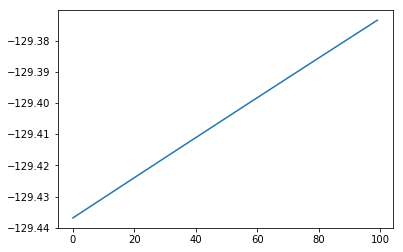

In [9]:
learning_rate = 10e-7
costs = []
for epoch in range(10000):
    output, hidden = forward(X, W1, b1, W2, b2)
    if epoch % 100 == 0:
        c = cost(T, output)
        P = np.argmax(output, axis=1)
        r = classification_rate(Y, P)
        print("cost:", c, "classification_rate:", r)
        costs.append(c)

    # this is gradient ASCENT, not DESCENT
    # be comfortable with both!
    # oldW2 = W2.copy()
    W2 += learning_rate * derivative_w2(hidden, T, output)
    b2 += learning_rate * derivative_b2(T, output)
    W1 += learning_rate * derivative_w1(X, hidden, T, output, W2)
    b1 += learning_rate * derivative_b1(T, output, W2, hidden)

plt.plot(costs)
plt.show()